Data used for analysis is obtained from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing. All rights belong to the original author.

### Import Necessary Packages

In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Initial Data Exploration

In [2]:
# Load the dataset from local drive
df = pd.read_csv(r'C:\Users\Edward\OneDrive\METIS files from Gigabyte laptop\METIS Project 3\bank.csv')


In [3]:
df.info()

# 11,162 data points, 16 feature variables with 1 dependent variable (deposit). No missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### Input variables:

### Bank client data:
- 1 - age (numeric)
- 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- 5 - default: has credit in default? (categorical: 'no','yes','unknown')
- 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
- 7 - loan: has personal loan? (categorical: 'no','yes','unknown')

### Related with the last contact of the current campaign:
- 8 - contact: contact communication type (categorical: 'cellular','telephone') 
- 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Other attributes:
- 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- 14 - previous: number of contacts performed before this campaign and for this client (numeric)
- 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Social and economic context attributes
- 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
- 17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
- 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
- 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
- 20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
- 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [4]:
df.head()

# 7 numerical variables, 9 categorical variables.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Visualize Individual Variables Using Boxplots

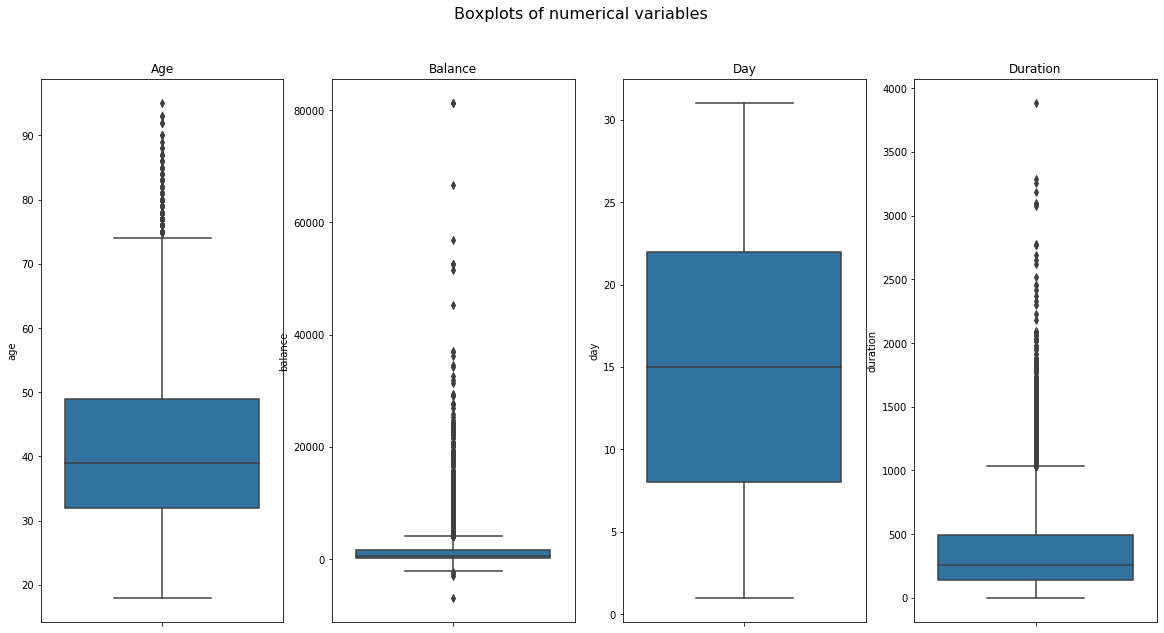

In [6]:
plt.figure(figsize=[20,10])

plt.suptitle('Boxplots of numerical variables',fontsize = 16)

plt.subplot(1,4,1) # (number of rows, number of columns, number of plot)
sns.boxplot(df.age, orient='v')
plt.title('Age')

plt.subplot(1,4,2)
sns.boxplot(df.balance, orient='v')
plt.title('Balance');

plt.subplot(1,4,3)
sns.boxplot(df.day, orient='v')
plt.title('Day');

plt.subplot(1,4,4)
sns.boxplot(df.duration, orient='v')
plt.title('Duration');


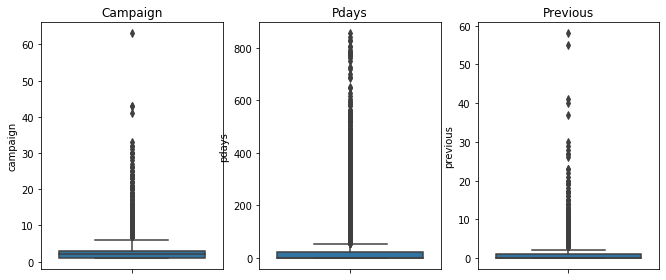

In [7]:
plt.figure(figsize=[15,10])

plt.subplot(2,4,5)
sns.boxplot(df.campaign, orient='v')
plt.title('Campaign');

plt.subplot(2,4,6)
sns.boxplot(df.pdays, orient='v')
plt.title('Pdays');

plt.subplot(2,4,7)
sns.boxplot(df.previous, orient='v')
plt.title('Previous');


As we are not doing linear regression, we are not too concerned with outliers.

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64


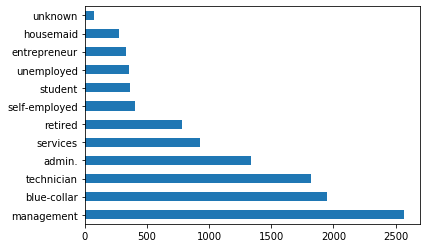

In [8]:
# Visualize occupations and count. Most people surveyed held management positions.

jobs = df.job.value_counts()
print(jobs)
jobs.plot.barh(x='job', y='count')

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64


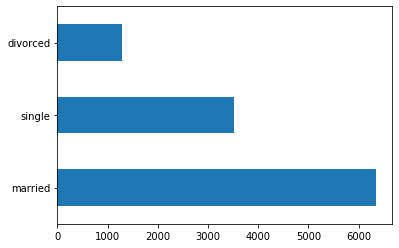

In [9]:
marital_num = df.marital.value_counts()
print(marital_num)
marital_num.plot.barh(x='marital', y='count')

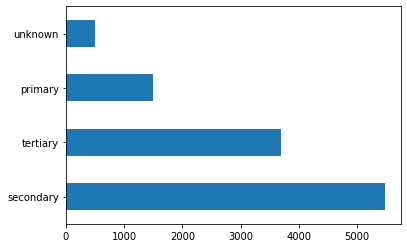

In [75]:
education_num = df.education.value_counts()
education_num.plot.barh(x='education', y='count')


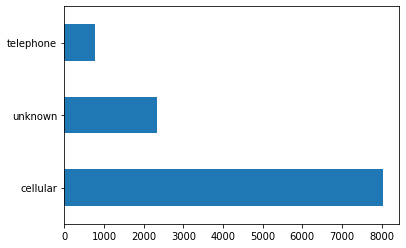

In [11]:
contact_num = df.contact.value_counts()
contact_num.plot.barh(x='education', y='count')

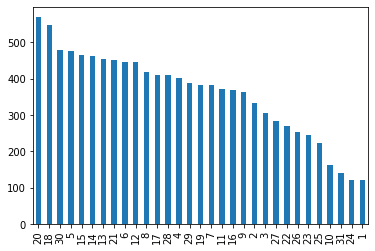

In [12]:
day_num = df.day.value_counts()
day_num.plot.bar(x='education', y='count')

### Checking For Imbalance In The Target Variable

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
 <a list of 7 Text yticklabel objects>)

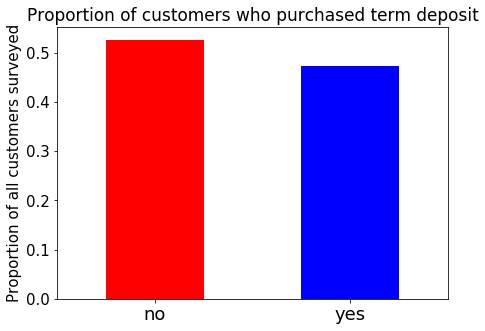

In [13]:
target = df.deposit.value_counts(normalize=True)

target.plot(kind='bar',color=['r','b'], figsize=[7,5])

plt.title('Proportion of customers who purchased term deposit', fontsize=17)
plt.ylabel('Proportion of all customers surveyed', fontsize=15)
plt.xticks(rotation='horizontal', fontsize=18)
plt.yticks(fontsize=15)


### Creating Dummy Variables for the Categorical Variables

In [14]:
# Create dummy variables for the job variable
df1 = pd.get_dummies(df['job'], drop_first=True)

# The admin column will be dropped

In [15]:
df1.rename({'unknown': 'unknown(job)'}, axis='columns').head(3)

# If you are working in admin, all values will be 0.

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown(job)
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0


In [16]:
df2 = pd.get_dummies(df['marital'], drop_first=True)

In [17]:
df2.head()

# If you are divorced, all columns will be 0.

,married,single
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [18]:
df3 = pd.get_dummies(df['education'], drop_first=True).rename({'unknown': 'unknown(education)'}, axis='columns')

# The primary column will be dropped.
# If the person had primary school education, all values would be 0.

In [19]:
df3.head()

,secondary,tertiary,unknown(education)
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0


In [20]:
df4 = pd.get_dummies(df['default'], drop_first=True).rename({'yes': 'yes(default)'}, axis='columns')

# If the person defaulted on the loan before, the value will be 1.

In [21]:
df4.head()

,yes(default)
0,0
1,0
2,0
3,0
4,0


In [22]:
df5 = pd.get_dummies(df['housing'], drop_first=True).rename({'yes': 'yes(housing)'}, axis='columns')

# If the person has a housing loan, the value will be 1.

In [23]:
df5.head()

,yes(housing)
0,1
1,0
2,1
3,1
4,0


In [24]:
df6 = pd.get_dummies(df['loan'], drop_first=True).rename({'yes': 'yes(loan)'}, axis='columns')

# If the person has a personal loan, the value will be 1.

In [25]:
df6.head()

,yes(loan)
0,0
1,0
2,0
3,0
4,0


In [26]:
df7 = pd.get_dummies(df['contact'], drop_first=True).rename({'unknown': 'unknown(contact)'}, axis='columns')

# If the person has been contacted through the cellphone ('cellular'), all column values will be 0.

In [27]:
df7.head()

,telephone,unknown(contact)
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [28]:
df8 = pd.get_dummies(df['month'], drop_first=True)

In [29]:
df8.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0


In [30]:
df9 = pd.get_dummies(df['poutcome'], drop_first=True).rename({'unknown': 'unknown(outcome)', 'other':'other(outcome)', 'success':'success(outcome)'}, axis='columns')

In [31]:
df9.head()

,other(outcome),success(outcome),unknown(outcome)
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [32]:
df10 = pd.get_dummies(df['deposit'],drop_first=True).rename({'yes':'yes(deposit)'}, axis='columns')

# If the person has purchased the term deposit, the value in the column is 1.

In [33]:
df10.head()

,yes(deposit)
0,1
1,1
2,1
3,1
4,1


## Concatenate dummy variables with the numerical variables

In [34]:
df_dums = pd.concat([df, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], axis=1)
df_dums.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,jun,mar,may,nov,oct,sep,other(outcome),success(outcome),unknown(outcome),yes(deposit)
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,1,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,...,0,0,1,0,0,0,0,0,1,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,1,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,1,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,...,0,0,1,0,0,0,0,0,1,1


In [35]:
# Drop the categorical variables with values in string form
df_dums.drop(['job','marital','month','education','default','housing','loan','contact','poutcome', 'deposit', 'month'], axis=1, inplace=True)

In [36]:
df_dums.head()

,age,balance,day,duration,campaign,pdays,previous,blue-collar,entrepreneur,housemaid,...,jun,mar,may,nov,oct,sep,other(outcome),success(outcome),unknown(outcome),yes(deposit)
0,59,2343,5,1042,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
1,56,45,5,1467,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
2,41,1270,5,1389,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,55,2476,5,579,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
4,54,184,5,673,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1


In [37]:
df_dums.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'unknown', 'married', 'single', 'secondary', 'tertiary',
       'unknown(education)', 'yes(default)', 'yes(housing)', 'yes(loan)',
       'telephone', 'unknown(contact)', 'aug', 'dec', 'feb', 'jan', 'jul',
       'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'other(outcome)',
       'success(outcome)', 'unknown(outcome)', 'yes(deposit)'],
      dtype='object')

In [38]:
# Relabelling some columns to make them easier to understand

df_dums.rename(columns={'pdays':'days_passed_after_last_contact','campaign':'num_contacts_during_cmpgn','day':'day_of_month', 'previous':'num_contacts_b4_campgn', 'unknown':'unknown(job)'}, inplace=True)

In [39]:
df_dums.columns

Index(['age', 'balance', 'day_of_month', 'duration',
       'num_contacts_during_cmpgn', 'days_passed_after_last_contact',
       'num_contacts_b4_campgn', 'blue-collar', 'entrepreneur', 'housemaid',
       'management', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'unknown(job)', 'married', 'single',
       'secondary', 'tertiary', 'unknown(education)', 'yes(default)',
       'yes(housing)', 'yes(loan)', 'telephone', 'unknown(contact)', 'aug',
       'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep',
       'other(outcome)', 'success(outcome)', 'unknown(outcome)',
       'yes(deposit)'],
      dtype='object')

In [40]:
# Finding out how many -1 values there are in the column 'Days passed after last contact'
# -1 may mean that they have not yet been contacted before. They are new customers.

df_dums['days_passed_after_last_contact'].value_counts()

-1      8324
 92      106
 182      89
 91       84
 181      81
 183      73
 184      52
 94       42
 93       41
 95       39
 87       34
 90       32
 98       31
 185      30
 187      28
 96       26
 97       26
 189      24
 188      24
 99       22
 105      22
 179      21
 175      20
 186      20
 370      19
 180      19
 196      19
 88       19
 89       18
 195      18
        ... 
 529       1
 481       1
 449       1
 403       1
 435       1
 459       1
 36        1
 476       1
 444       1
 428       1
 420       1
 404       1
 268       1
 228       1
 108       1
 68        1
 44        1
 20        1
 475       1
 12        1
 4         1
 771       1
 651       1
 603       1
 595       1
 587       1
 579       1
 515       1
 491       1
 683       1
Name: days_passed_after_last_contact, Length: 472, dtype: int64

In [41]:
df_dums.describe()

,age,balance,day_of_month,duration,num_contacts_during_cmpgn,days_passed_after_last_contact,num_contacts_b4_campgn,blue-collar,entrepreneur,housemaid,...,jun,mar,may,nov,oct,sep,other(outcome),success(outcome),unknown(outcome),yes(deposit)
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,...,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557,0.174162,0.029385,0.024548,...,0.109479,0.024727,0.253001,0.084483,0.035119,0.028579,0.048110,0.095951,0.745924,0.473840
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007,0.379266,0.168892,0.154749,...,0.312253,0.155298,0.434751,0.278123,0.184089,0.166628,0.214008,0.294537,0.435360,0.499338
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Let's see how the variables are correlated with each other

In [52]:
df_dums.corr()

,age,balance,day_of_month,duration,num_contacts_during_cmpgn,days_passed_after_last_contact,num_contacts_b4_campgn,blue-collar,entrepreneur,housemaid,...,jun,mar,may,nov,oct,sep,other(outcome),success(outcome),unknown(outcome),yes(deposit)
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169,-0.066567,0.024176,0.082739,...,0.009046,0.029346,-0.122287,0.020910,0.067004,0.040306,-0.018715,0.062114,-0.027021,0.034901
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805,-0.046220,0.005039,-0.007987,...,0.007900,0.029131,-0.060661,0.077362,0.030111,0.021383,0.028521,0.045603,-0.046091,0.081129
day_of_month,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981,-0.023039,-0.004463,0.013318,...,-0.181728,-0.041973,-0.010188,0.062185,0.079939,-0.072279,-0.007526,-0.044280,0.082807,-0.056326
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716,0.029986,-0.000908,-0.010807,...,-0.007325,-0.036984,0.010680,-0.007683,-0.013847,-0.010389,-0.008782,-0.022578,0.044006,0.451919
num_contacts_during_cmpgn,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699,0.005522,0.013883,0.010570,...,0.044453,-0.029530,-0.038520,-0.077215,-0.069786,-0.049224,-0.023689,-0.091807,0.131392,-0.128081
days_passed_after_last_contact,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272,-0.030695,-0.029732,-0.025950,...,-0.094826,0.021950,0.026120,-0.011859,0.074312,0.104793,0.341404,0.329567,-0.823928,0.151593
num_contacts_b4_campgn,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000,-0.039939,-0.022470,-0.022766,...,-0.050000,0.028498,-0.025009,0.016852,0.055771,0.092765,0.326587,0.325477,-0.622149,0.139867
blue-collar,-0.066567,-0.046220,-0.023039,0.029986,0.005522,-0.030695,-0.039939,1.000000,-0.079905,-0.072850,...,0.034933,-0.057910,0.170171,-0.029079,-0.054247,-0.047577,-0.002788,-0.077422,0.066703,-0.100840
entrepreneur,0.024176,0.005039,-0.004463,-0.000908,0.013883,-0.029732,-0.022470,-0.079905,1.000000,-0.027602,...,0.022241,-0.020873,-0.017064,0.052053,-0.018787,-0.007558,-0.024244,-0.035072,0.036967,-0.034443
housemaid,0.082739,-0.007987,0.013318,-0.010807,0.010570,-0.025950,-0.022766,-0.072850,-0.027602,1.000000,...,0.042653,0.000838,-0.051037,-0.006554,0.007477,-0.006361,-0.011314,-0.008434,0.023429,-0.024155


### We can visualize the correlations better using a heatmap

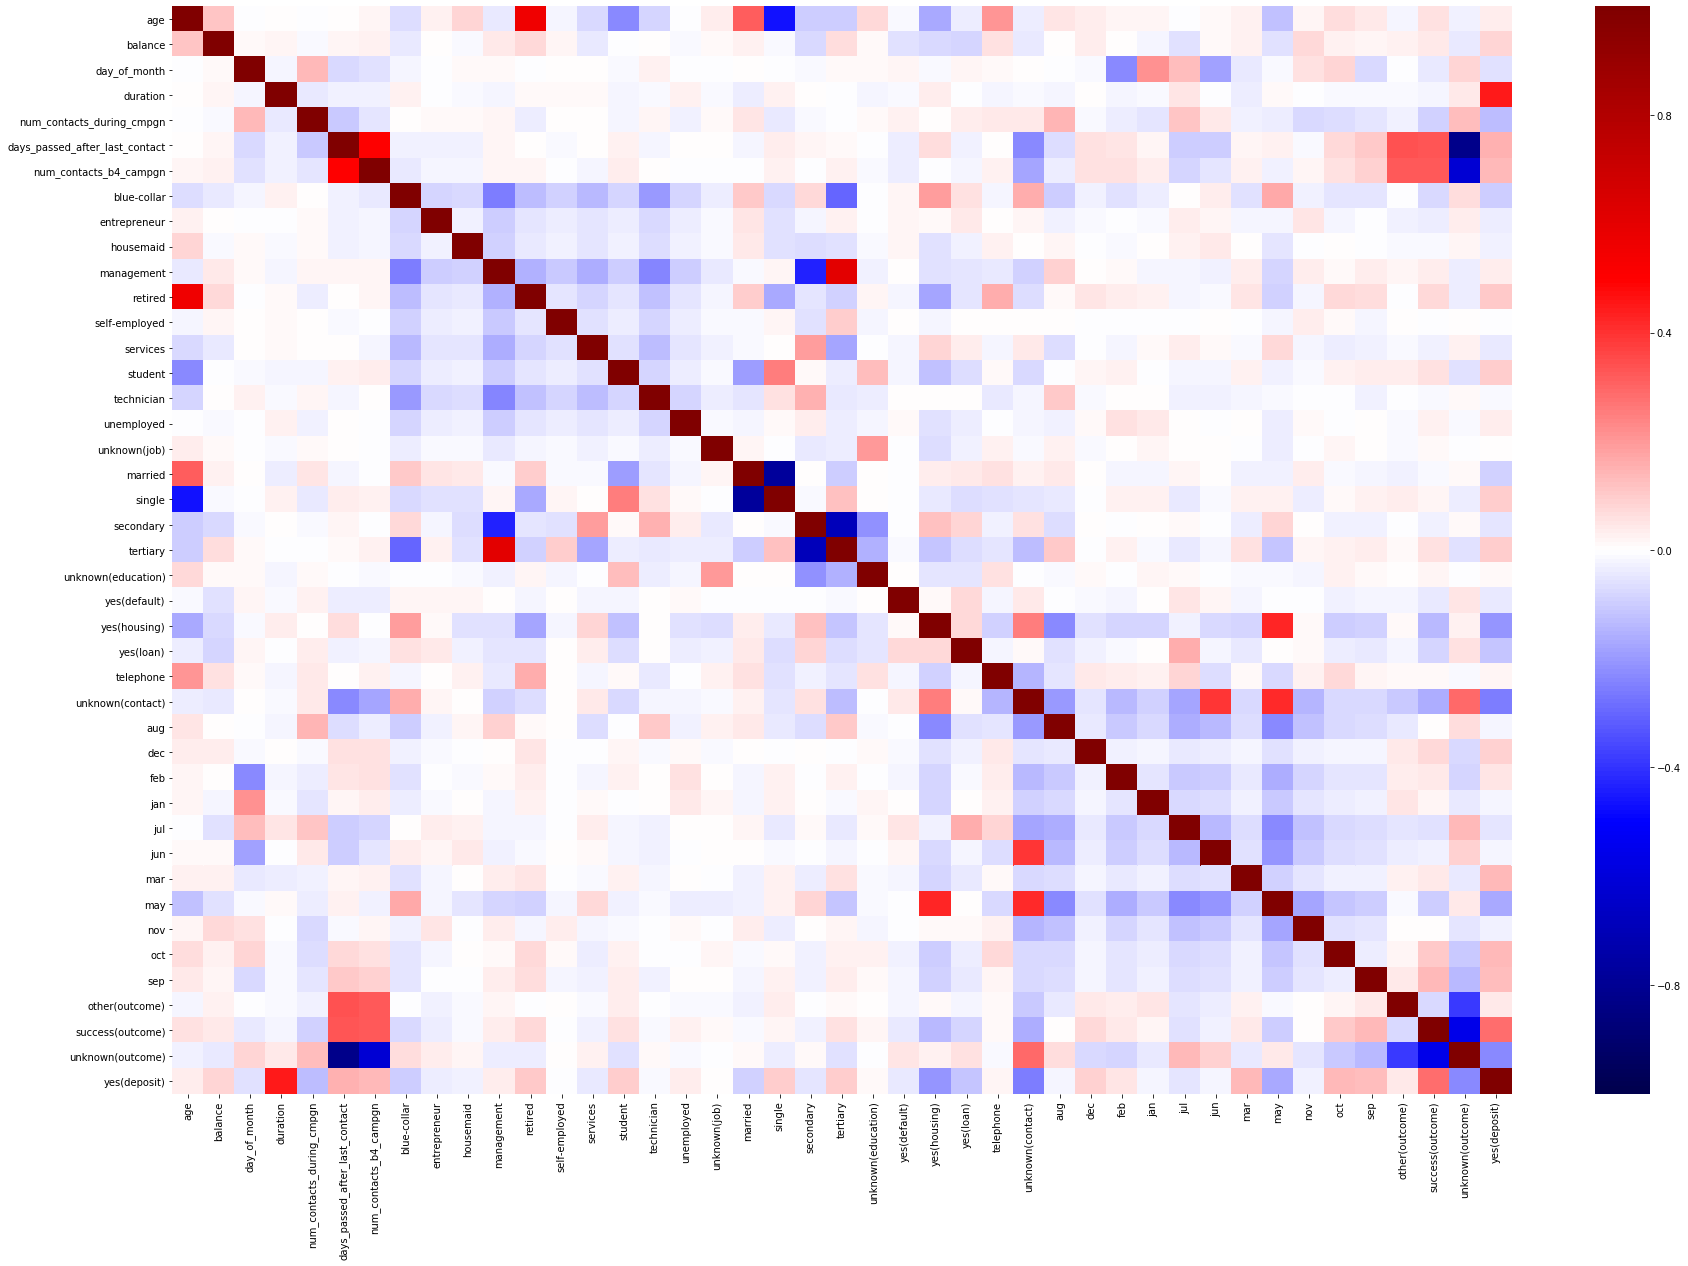

In [45]:
plt.subplots(figsize=(30,20))
sns.heatmap(df_dums.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1)


### Let's find out which variables have the lowest correlations with the target variable 'yes(deposit)'

In [67]:
# Assign the calculated correlations into a new variable called all_corr
all_corr = df_dums.corr()

# Unstack them so we can see how each variable correlates with each other in 1 column instead of a DataFrame
unstacked = all_corr.unstack()
# print(unstacked)

# Only show the correlations between variables and the target variable
unstacked_yes = unstacked['yes(deposit)']
# print(unstacked_yes)

# Only display variables which has a correlation less than 0.1 and above -0.1.
unstacked_lowest = unstacked_yes[(unstacked['yes(deposit)'] < 0.1) & (unstacked['yes(deposit)'] > -0.1)]
# print(unstacked_lowest)

# Sort the correlations in ascending order 
unstacked_sorted = unstacked_lowest.sort_values(ascending=True)
print(unstacked_sorted)

print(len(unstacked_sorted))


married              -0.092157
day_of_month         -0.056326
secondary            -0.051952
jul                  -0.047368
services             -0.044531
yes(default)         -0.040680
entrepreneur         -0.034443
nov                  -0.028278
housemaid            -0.024155
jan                  -0.021803
jun                  -0.018982
aug                  -0.016621
technician           -0.011557
self-employed        -0.004707
unknown(job)          0.001889
unknown(education)    0.014355
telephone             0.016420
unemployed            0.033487
age                   0.034901
management            0.036301
other(outcome)        0.044059
feb                   0.051710
balance               0.081129
dec                   0.086964
tertiary              0.094598
single                0.094632
student               0.099953
dtype: float64
27


### Seems that a large proportion of the variables (27 out of 42) have extremely low correlations. Let's check out the variables with 'higher' correlations.

In [62]:
all_corr2 = df_dums.corr()

unstacked2 = all_corr2.unstack()

unstacked_yes2 = unstacked2['yes(deposit)']

unstacked_higher = unstacked_yes2[(unstacked['yes(deposit)'] > 0.1) | (unstacked['yes(deposit)'] < -0.1)]

print(unstacked_higher.sort_values(ascending=True))

print(len(unstacked_higher))

unknown(contact)                 -0.256136
unknown(outcome)                 -0.230470
yes(housing)                     -0.203888
may                              -0.170507
num_contacts_during_cmpgn        -0.128081
yes(loan)                        -0.110580
blue-collar                      -0.100840
retired                           0.103827
sep                               0.126901
oct                               0.133783
mar                               0.135438
num_contacts_b4_campgn            0.139867
days_passed_after_last_contact    0.151593
success(outcome)                  0.286642
duration                          0.451919
yes(deposit)                      1.000000
dtype: float64
16


### Looks like we have 27 variables with extremely low correlations and 16 variables that have 'higher' correlations

### We can check the distribution of our target variable in relation to each variable using pairplots

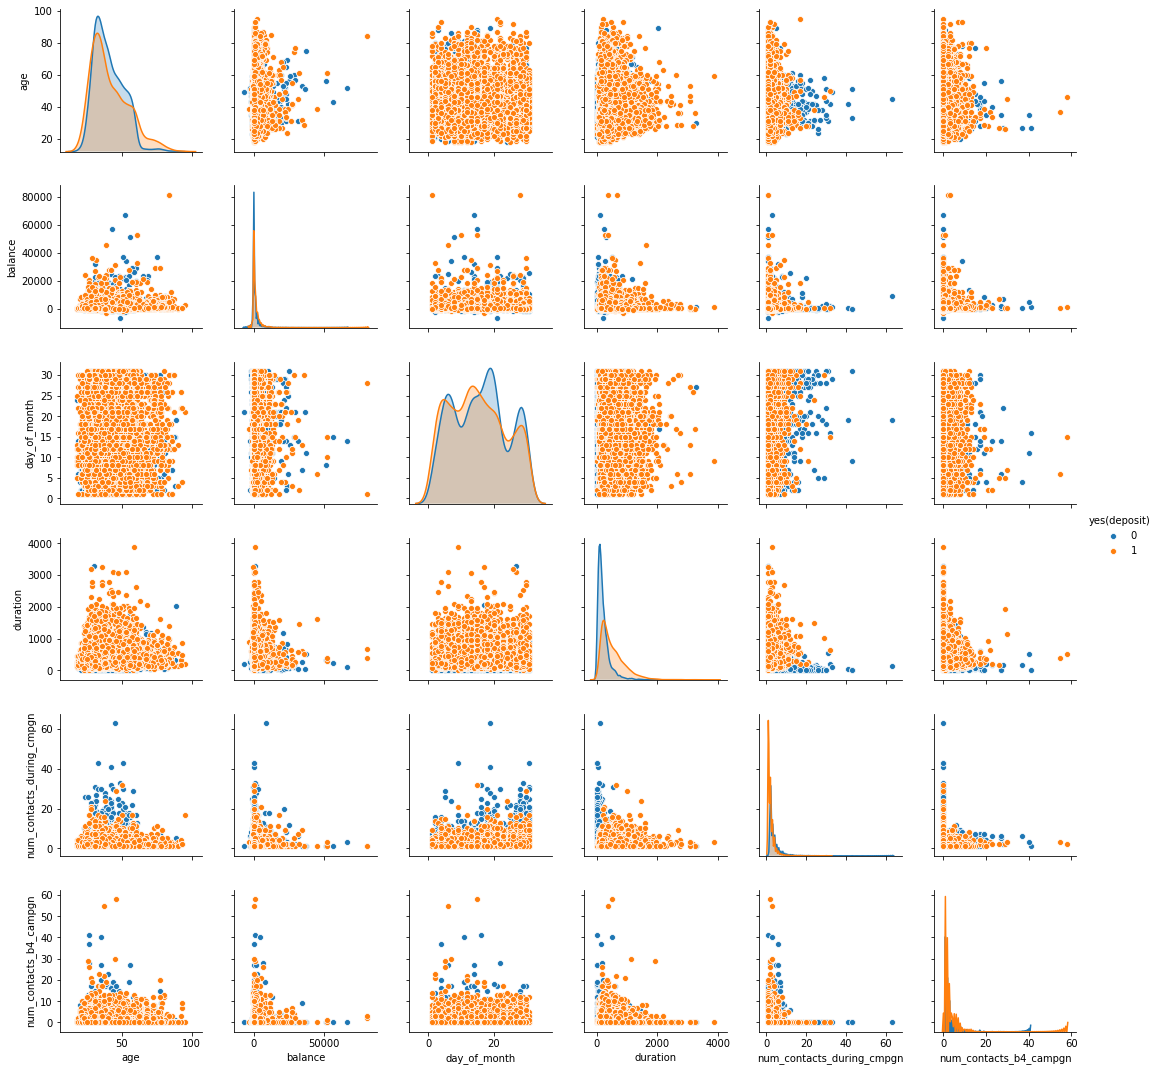

In [78]:
sns.pairplot(df_dums, hue='yes(deposit)', vars=['age','balance','day_of_month','duration','num_contacts_during_cmpgn','num_contacts_b4_campgn'])

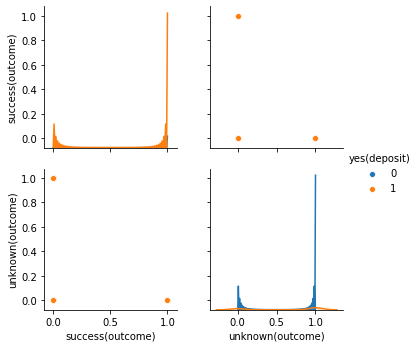

In [79]:
sns.pairplot(df_dums, hue='yes(deposit)', vars=['success(outcome)','unknown(outcome)'])

### Convert our DataFrame with dummies into a csv file to be accessed for analysis in another Jupyter Notebook

In [ ]:
df_dums.to_csv(r'C:/Users/Edward/Desktop/Data Science/METIS Project 3/banking_dataset_cleaned.csv')